In [124]:
import numpy as np
import scipy.optimize as sp
import enum

Schemat utworzenia tabeleau:
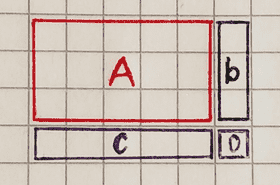

In [164]:
class Simplex():
    class EqType(enum.Enum):
        """ Equations type"""
        Equal = 0,
        Greater = 1,
        Smaller = 2
    
    @staticmethod
    def Simplex(A,b,c, eType=Simplex.EqType.Smaller):
        tableau = Simplex.__generateTableau(A,b,c,eType)
        for i in range(A.shape[1]):
            Simplex.__calculateProportionality(tableau, i)
            Simplex.__gaussianRowReduction(tableau, i)
            
        Simplex.__backwardSubstitution(tableau,2)
        return tableau[:,:-1]
        
    @staticmethod
    def __generateTableau(A, b, c, eType):
        """
        Generate Tableau
        """
        AShape = A.shape
        
        # If equations are equal or smaller
        if eType == Simplex.EqType.Smaller:
            A = np.concatenate((A,np.diag(np.ones(AShape[0]))), axis=1)    
        
        # If equations are equal or bigger
        if eType == Simplex.EqType.Greater:
            A = np.concatenate((A,np.diag(np.ones(AShape[0])*(-1))), axis=1)     
        
        #Generate table
        tableau = np.concatenate((A,b), axis=1) # Concatenata A,b matrix 
        tableau = np.concatenate((tableau,np.zeros((tableau.shape[0],1))), axis=1) #wsp. proporcjonalności
        tableau = np.concatenate((tableau,np.zeros((1,tableau.shape[1]))), axis=0) # func celu
        tableau[tableau.shape[0]-1,0:c.size] = c
        return tableau
    
    
    @staticmethod
    def __calculateProportionality(tableau, column):
        """
        Calculate proportionality coefficient
        """
        tableau[:-1,[-1]]=tableau[:-1,[-2]]/tableau[:-1,[column]]
        
    @staticmethod
    def __gaussianRowReduction(tableau, column):
        basicRow = np.argmin( np.abs(tableau[column:-1,-1]) )
        
        #Pivoting
        #tmp = np.copy(tableau[basicRow,:])
        #tableau[basicRow,:] = tableau[column,:]
        #tableau[column,:]  = tmp
        
        #Elimination 
        coef = tableau[column+1:,[column]]/tableau[column,column]
        tableau[column+1:,:] -= np.multiply(coef,tableau[column,:])
        
    def __backwardSubstitution(tableau, numColumns):
        for i in range(1,numColumns):
            coef = tableau[:i,[i]]*-(tableau[i,-2]/tableau[i,i])
            tableau[:i,[i]] = 0
            tableau[:i,[-2]] += coef

## Zadanie 1
---
Znajdź liczby x1 i x2 , które maksymalizują sumę x1 + x2 przy ograniczeniach:
$$
x1 ≥ 0, x2 ≥ 0, \\
x1 + 2x2 ≤ 4, \\
4x1 + 2x2 ≤ 12,\\
−x 1 + x2 ≤ 1,
$$
Narysować zbiór dopuszczalnych rozwiązań na $R^2$ i znaleźć rozwiązanie w ujęciu
geometrycznym, formułując zadanie programowania liniowego.


In [165]:
A = np.array([[1,2],
              [4,2],
              [-1,1]])
b = np.array([4,12,1]).reshape(3,1)
c = np.array([-1,-1])
t = Simplex.Simplex(A,b,c,Simplex.EqType.Smaller)
print(t[:2,-1]/np.diag(t)[:2])


sp.linprog(method='simplex', A_ub=A, b_ub=b, c=np.array([-1,-1]))

[2.66666667 0.66666667]


     con: array([], dtype=float64)
     fun: -3.333333333333333
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([4.4408921e-16, 0.0000000e+00, 3.0000000e+00])
  status: 0
 success: True
       x: array([2.66666667, 0.66666667])

## Zadanie 2
---
Zrównoważona normalna dieta zakłada, że codziennie powinniśmy spożywać co
najmniej 60 gramów białka i co najmniej 120 gramów węglowodanów. Zakładamy, że 100
gram sera zawiera 20 gramy białka i 20 gramy węglowodanów, natomiast taka sama ilość
chleba zawiera 10 gram białka i 30 gramy węglowodanów. Proszę wyznaczyć najbardziej
ekonomiczną dietę przy założeniu, że cena sera wynosi 30 zł/kg, a chleba 20 zł/kg.


Wymagania: 
- Białko $\geqslant$ 60
- Węglowaodany $\geqslant$ 120

Założenia:
- Ser w 100g: (Cena: 3zł/100g) 
    - 20g białka
    - 20g węglowodanów
- Chleb w 100g: (Cena: 2zł/100g) 
    - 10g białka
    - 30g węglowodanów
    
---
Minimalizacja funkcji celu : $3x_1+2x_2$, gdzie 

$x_1$-ser, 

$x_2$-chleb

Przy założeniach:
$$
\left\{\begin{matrix}
20x_1 & + & 10x_2 & \geq  & 60 \\ 
20x_1 & + & 30x_2 & \geq  & 120
\end{matrix}\right.
$$

In [166]:
A = np.array([[20,10],
              [20,30]])
b = np.array([[60],
              [120]])
c = np.array([3,2])

t = Simplex.Simplex(A,b,c,Simplex.EqType.Greater)
print(t[:2,-1]/np.diag(t)[:2])

sp.linprog(method='simplex', A_eq=A, b_eq=b, c=c)

[1.5 3. ]


     con: array([0., 0.])
     fun: 10.5
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([1.5, 3. ])